In [1]:
# Import libraries
from pprint import pprint
import numpy as np
import matplotlib.pyplot as plt

import zfit
from particle import Particle
from decaylanguage import DecFileParser, DecayChainViewer, DecayChain, DecayMode
import tensorflow as tf

from phasespace.fromdecay import GenMultiDecay

import phasespace
import DarkNews as dn
from DarkNews import const

/usr/local/anaconda3/envs/py39/lib/python3.9/site-packages/zfit/__init__.py:62: UserWarning: TensorFlow warnings are by default suppressed by zfit. In order to show them, set the environment variable ZFIT_DISABLE_TF_WARNINGS=0. In order to suppress the TensorFlow warnings AND this warning, set ZFIT_DISABLE_TF_WARNINGS=1.
  warnings.warn(
/usr/local/anaconda3/envs/py39/lib/python3.9/site-packages/zfit/core/basemodel.py:199: UserWarning: For the future, also decorate _pdf with @supports and specify what you support (such as 'norm=True' to keep the same behavior as before)
  warnings.warn(


In [131]:

B0_MASS = 5279.65
PION_MASS = 139.57018
KAON_MASS = 493.677

weights, w_max, particles = phasespace.nbody_decay(1.0,
                                            [0., 0]).generate(n_events=10000, normalize_weights=False)



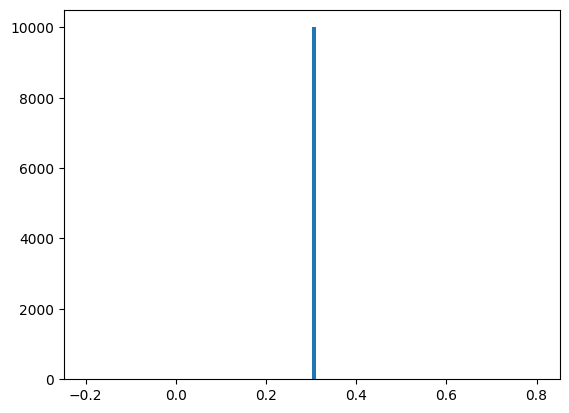

In [130]:
# plt.plot(w_max)
_=plt.hist(-np.log10(weights), bins=100)

In [65]:
import phasespace

B0_MASS = 5279.65
PION_MASS = 139.57018
KAON_MASS = 493.677

weights, particles = phasespace.nbody_decay(1.0,
                                            [0.25, 0.2, 0.3]).generate(n_events=10000, normalize_weights=True)



# list of daughter particles
daughter_names = list(particles.keys())

# 4-momentum of the parent particle
p_parent = np.zeros_like(particles[daughter_names[0]])
p_parent = np.sum([particles[k] for k in daughter_names], axis=0)

# We need to rearrange the arrays so the first enetry is energy, and not px:
# `phasespace` indices: 0 -> px, 1 -> py, 2 -> pz, 3 -> E
# `MadGraph` and `DarkNews` indices: 0 -> E, 1 -> px, 2 -> py, 3 -> pz
def put_energy_first(P):
    return P[:,[3,0,1,2]]

# when rearranging, also convert from TensorFlow object to numpy array
for k in daughter_names:
    particles[k] = put_energy_first(np.array(particles[k]))
weights = np.array(weights)

def build_P_grid(particles, p_parent):
    # Ordering --> Parent + daughters(following MadGraph convention)
    return np.transpose([p_parent] + [particles[k] for k in daughter_names], axes=(1,2,0) )

P_grid = build_P_grid(particles, p_parent)

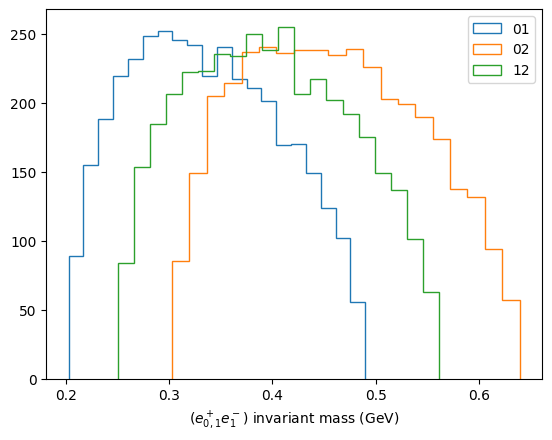

In [87]:
# plot an invariant mass dist with flat amplitude:

p_01 = particles['p_0']+particles['p_1'] 
p_02 = particles['p_0']+particles['p_2'] 
p_12 = particles['p_1']+particles['p_2'] 

m_01 = dn.Cfourvec.dot4(p_01, p_01)
m_02 = dn.Cfourvec.dot4(p_02, p_02)
m_12 = dn.Cfourvec.dot4(p_12, p_12)

_ = plt.hist(m_01, bins=20, weights=weights, histtype='step', label=r'01')
_ = plt.hist(m_02, bins=20, weights=weights, histtype='step', label=r'02')
_ = plt.hist(m_12, bins=20, weights=weights, histtype='step', label=r'12')

plt.xlabel(r'$(e^+_{0,1}e^-_1)$ invariant mass (GeV)')
plt.legend()

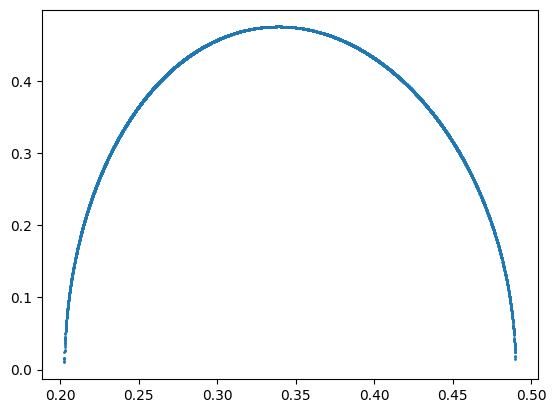

In [103]:
plt.scatter(m_01, weights, s=1)

In [8]:
from phasespace import GenParticle

electron_1 = GenParticle('e-', const.m_e)
positron_1 = GenParticle('e+', const.m_e)
electron_2 = GenParticle('e-', const.m_e)
positron_2 = GenParticle('e+', const.m_e)
positron = GenParticle('e+', const.m_e)

nue = GenParticle('nu_e', 0.0)
numubar = GenParticle('nu_mu_bar', 0.0)

muon = GenParticle('mu+', const.m_mu).set_children(
                                            numubar, 
                                            nue, 
                                            positron, 
                                            electron_1, 
                                            positron_1, 
                                            electron_2, 
                                            positron_2)

In [5]:
phasespace.nbody_decay(const.m_mu, [const.m_e,const.m_e]).__dict__

{'name': 'top',
 'children': (<phasespace.GenParticle: name='p_0' mass=0.00 children=[]>,
  <phasespace.GenParticle: name='p_1' mass=0.00 children=[]>),
 '_mass_val': 0.1056583755,
 '_mass': <tf.Tensor: shape=(), dtype=float64, numpy=0.1056583755>,
 '_generate_called': False}

In [40]:

daughter_masses = 5*[const.m_e]+ [0,0]
print(daughter_masses)
weights, particles = phasespace.nbody_decay(const.m_mu,
                                            daughter_masses).generate(n_events=100)

[0.0005109989500015, 0.0005109989500015, 0.0005109989500015, 0.0005109989500015, 0.0005109989500015, 0, 0]


In [45]:
particles.keys()

dict_keys(['p_0', 'p_1', 'p_2', 'p_3', 'p_4', 'p_5', 'p_6'])

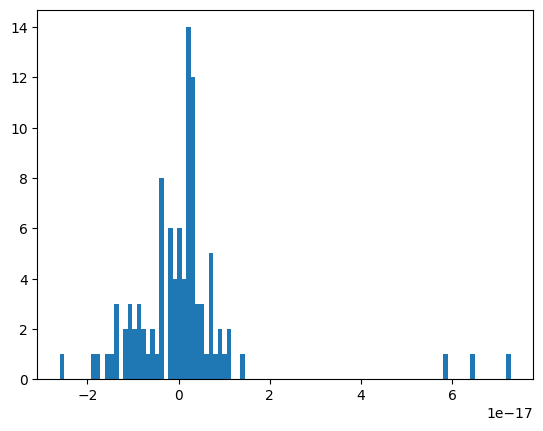

In [57]:
# Pmu = np.array(particles['p_6'])
Pmu = np.sum([particles[f'p_{i}'] for i in range(0,7)], axis = 0)
np.shape(Pmu)
_ = plt.hist(Pmu[:,0], bins=100)

In [59]:
Pmu[:,1]

array([ 1.78893358e-18, -8.67361738e-18, -3.46944695e-18, -7.31836466e-18,
       -3.46944695e-18, -8.67361738e-18, -5.20417043e-18,  3.46944695e-18,
       -1.73472348e-18,  8.67361738e-19,  1.73472348e-17,  8.67361738e-18,
       -8.67361738e-18,  0.00000000e+00, -9.97465999e-18,  0.00000000e+00,
        3.46944695e-18, -1.21430643e-17, -4.55364912e-18,  6.93889390e-18,
        2.08166817e-17,  1.73472348e-18, -1.38777878e-17,  0.00000000e+00,
       -4.33680869e-17, -3.03576608e-18, -1.56125113e-17, -1.62630326e-18,
       -3.46944695e-18,  2.60208521e-18,  2.60208521e-18,  3.46944695e-18,
       -8.67361738e-18, -9.10729825e-18,  1.04083409e-17,  1.38777878e-17,
       -2.60208521e-18, -4.28259858e-18,  2.05998413e-18, -5.25838054e-18,
        3.46944695e-18,  6.07153217e-18, -6.93889390e-18,  0.00000000e+00,
       -2.02745806e-17,  1.91632734e-17, -2.23345648e-17,  5.20417043e-18,
       -2.34187669e-17,  0.00000000e+00, -1.95156391e-18, -4.38017678e-17,
       -3.46944695e-18,  